# Work-Life Balance: Unveiling the Factors Influencing Workload

## Business Understanding

My target audience are people who are seeking a work-life balance in their life.  The purpose of this work is to identify the factors that influence high workloads.  This is done on the bases of the 1994 U.S. Census dataset which can be found here: https://www.kaggle.com/competitions/udacity-mlcharity-competition/data

It contains the following features:
* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.
* **income**: categorical.

### Questions to Analyze
- What percentage of people work overtime?
- What three jobs have the highest percentage of people working overtime?
- In what sectors do the hard working people work?
- What factors have a high influence on high working hours?

----
## Data Understanding

### Gather Data

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Load the Census dataset
data = pd.read_csv("census.csv")

### Assess Data

In [2]:
display(data.head(n=1))

WORK_HOURS_THRESHOLD = 45

# Total number of records
n_records = data.shape[0]

# Number of records where individual's work (and work not) long hours
high_work = data['hours-per-week'] >= WORK_HOURS_THRESHOLD
n_high_work = np.sum(high_work)
n_normal_work = n_records - n_high_work

# Print the results
print("Total number of records: {}".format(n_records))
print("Individuals working at least ", WORK_HOURS_THRESHOLD, " hours: ", n_high_work)
print("Individuals working less hours: {}".format(n_normal_work))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


Total number of records: 45222
Individuals working at least  45  hours:  12875
Individuals working less hours: 32347


In [3]:
# Check for missing values
missing_counts = data.isnull().sum()
print(missing_counts)

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64


### Analyze Data

### Question 1: What percentage of people work overtime?

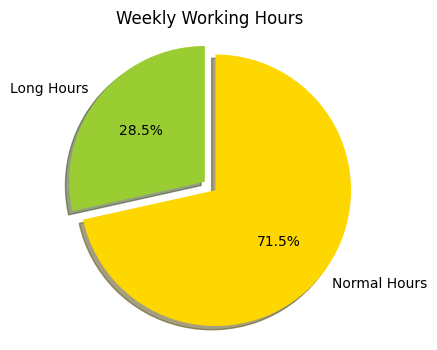

In [4]:
plt.figure(figsize =(4,4))
labels = 'Long Hours', 'Normal Hours'
sizes = [n_high_work, n_normal_work]
colors = ['yellowgreen', 'gold']
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title('Weekly Working Hours')
plt.show()

### Question 2: What are three jobs have the highest percentage of people working overtime?

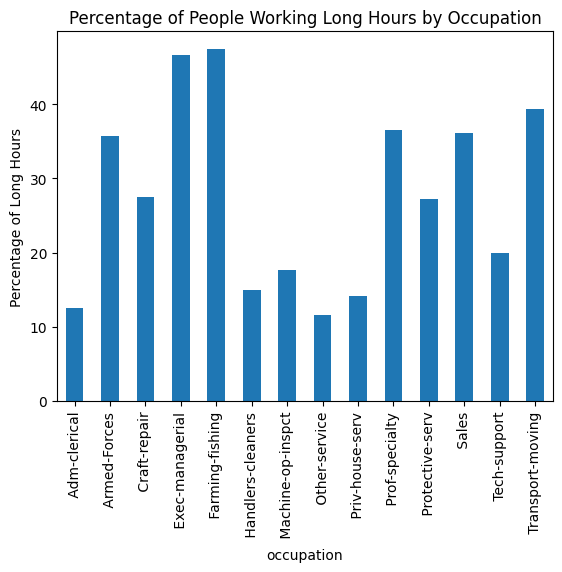

In [5]:
# Assuming you have a DataFrame named 'df' with columns 'occupation' and 'long_hours'
#data = data[data['hours-per-week'] >= 20]
df = data
df['long_hours'] = data['hours-per-week'] >= WORK_HOURS_THRESHOLD

#display(df)

df_short = df[['long_hours', 'occupation']]

# Grouping the data by 'occupation' and calculating the percentage of True values in 'long_hours'
occupation_counts = df.groupby('occupation')['long_hours'].mean() * 100

# Plotting the bar plot
occupation_counts.plot(kind='bar')

# Plotting the bar plot
ax = occupation_counts.plot(kind='bar')

# Adding labels and title
#plt.xlabel('Occupation')
plt.ylabel('Percentage of Long Hours')
plt.title('Percentage of People Working Long Hours by Occupation')

# Adding the actual percentage values on top of each bar
# for i, v in enumerate(occupation_counts):
#     ax.text(i, v + 1, f'{v:.1f}%', ha='center')

# Displaying the plot
plt.show()

### Question 3: In what sectors do the hard working people work?

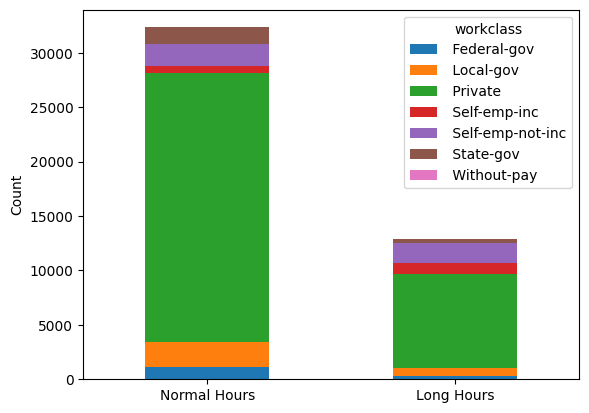

In [6]:
contingency_table = pd.crosstab(df['long_hours'], [df['workclass']])

ax = contingency_table.plot(kind='bar', stacked=True)
ax.set_xticklabels(['Normal Hours', 'Long Hours'], rotation=0)
ax.set_xlabel('')
plt.ylabel('Count')
plt.show()

## Data Preparation

To address the fourth question, we can model the problem as a binary classification problem.  This requires to extract the target feature 'hours-per-week' from our data set and to replace its values with True, if the number of hours correspond to "Long Hours", and False otherwise.

Then we need to scale the numeric values to avoid that one feature dominates the other features and we need to transform the categorical features to numeric or Boolean values which we will do via One-Hot-Encoding.

### Clean Data

In [7]:
# Split the data into features and target label (already at this stage, since the 'hours-per-week' column)
# requires neither scaling nor One-Hot-Encoding)
high_work = data['hours-per-week'] >= WORK_HOURS_THRESHOLD
data.drop('hours-per-week', axis=1, inplace=True)
data.drop('long_hours', axis=1, inplace=True)

# Feature Scaling
scaler = MinMaxScaler()
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss']
features_scaled = data
features_scaled[numerical] = scaler.fit_transform(features_scaled[numerical])
display(features_scaled.head(n = 5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,income
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,United-States,<=50K
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,United-States,<=50K
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,United-States,<=50K
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,United-States,<=50K
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,Cuba,<=50K


In [8]:
# One-Hot-Encoding
non_numerical = list(set(features_scaled.columns) - set(numerical))
encoded_columns = pd.get_dummies(features_scaled[non_numerical])

# remove orginial columns of those that ore now one-hot-encoded
features_scaled.drop(non_numerical, axis=1, inplace=True)

features_final = pd.concat([features_scaled, encoded_columns], axis=1)

## Data Modeling


In [9]:
# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    high_work, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

model = AdaBoostClassifier(random_state=42)
model_fit = model.fit(X_train, y_train)
predictions = model.predict(X_test)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


## Result Evaluation

In [10]:
from sklearn.metrics import fbeta_score, accuracy_score

print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))

Final accuracy score on the testing data: 0.7582
Final F-score on the testing data: 0.5317


### Question 4: What factors have a high influence on high working hours?

In [11]:
def plot_data_distribution(importances, weight_treshold, df1, df2):
    '''
    INPUT
    importances - feature importances of the predictive model 
    weight_treshold - treshold set for 'high influence' features
    df1 - pandas dataframe containing the above features
    df2 - pandas dataframe containing the above features
    
    OUTPUT
    histogram plots
    
    This function plots the stacked histograms for all features that have at least a predictive weight of 
    'weight_treshold'.  Values of df2 are stacked on top of values of df1

    '''

    indices = np.argsort(importances)[::-1]
    columns = X_train.columns.values[indices]
    values = importances[indices]
    i = 0
    while (values[i] >= weight_treshold):
        feature = columns[i]
        plt.hist([df1[feature], df2[feature]], bins=10, stacked=True)
        plt.xlabel(feature)
        plt.ylabel('Frequency')
        #plt.title('Stacked Histogram of A based on B')
        plt.legend(['Long Hours', 'Normal Hours'])
        plt.show()        
#         print(columns[i])
        i = i+1

In [12]:
data = pd.read_csv("census.csv")

importances = model_fit.feature_importances_
Long_hours = data[data['hours-per-week'] >= WORK_HOURS_THRESHOLD]
Normal_hours = data[data['hours-per-week'] < WORK_HOURS_THRESHOLD]

### Visualize Results

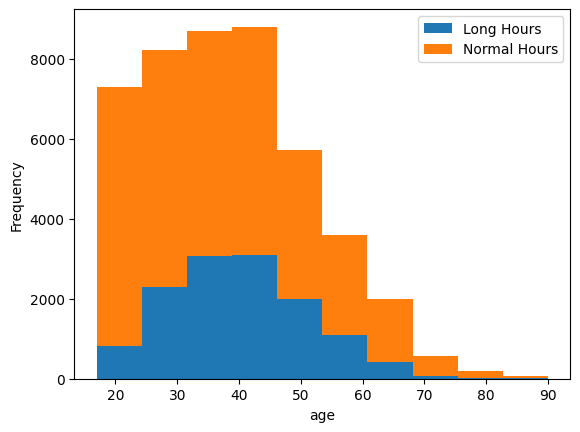

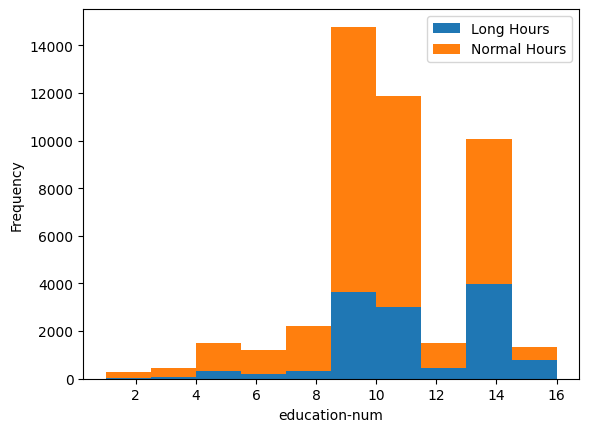

In [13]:
plot_data_distribution(importances, 0.05, Long_hours, Normal_hours)

In [14]:
df_edu = data[['education-num', 'education_level']].drop_duplicates().sort_values(by='education-num')
display(df_edu)

,education-num,education_level
208,1.0,Preschool
386,2.0,1st-4th
52,3.0,5th-6th
14,4.0,7th-8th
6,5.0,9th
204,6.0,10th
3,7.0,11th
385,8.0,12th
2,9.0,HS-grad
10,10.0,Some-college


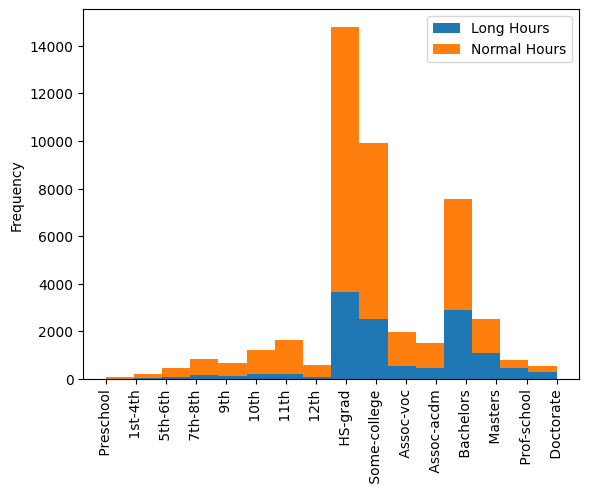

In [15]:
feature = 'education-num'
plt.hist([Long_hours[feature], Normal_hours[feature]], bins=16, stacked=True)
plt.xticks(range(1, 17), df_edu['education_level'].tolist(), rotation='vertical')
#plt.xlabel(feature)
plt.ylabel('Frequency')
#plt.title('Stacked Histogram of A based on B')
plt.legend(['Long Hours', 'Normal Hours'])
plt.show()

## Deployment

Information on the dissimilation of the results can be found in this blog: https://github.com/AnikaAI/Work-Life-Balance/blob/main/blog.pdf